In [1]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to c:\users\lydia\appdata\local\temp\pip-install-72nz838c\twint_2ca6dce825c54b878122a369eb7530c5


  Running command git clone -q https://github.com/twintproject/twint.git 'C:\Users\Lydia\AppData\Local\Temp\pip-install-72nz838c\twint_2ca6dce825c54b878122a369eb7530c5'
  fatal: unable to access 'https://github.com/twintproject/twint.git/': Failed to connect to github.com port 443 after 21499 ms: Timed out
ERROR: Could not find a version that satisfies the requirement twint (unavailable) (from versions: 1.1.0, 1.1.1, 1.1.2.1, 1.1.2.2, 1.1.2.3, 1.1.2.4, 1.1.2.5, 1.1.2.6, 1.1.3, 1.1.3.1, 1.1.3.2, 1.1.3.3, 1.1.4, 1.1.4.1, 1.1.4.2, 1.1.4.3, 1.2.0.0, 1.2.5, 1.2.6, 1.2.7, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.1.7, 2.1.8, 2.1.9, 2.1.10, 2.1.11, 2.1.12, 2.1.13, 2.1.14, 2.1.15, 2.1.16, 2.1.17, 2.1.18, 2.1.19, 2.1.20)
ERROR: No matching distribution found for twint (unavailable)


In [2]:
! pip install nest_asyncio
! pip install textblob
! pip install Twint

In [3]:
import twint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nest_asyncio 
from datetime import datetime
import re
import glob                     
import os
nest_asyncio.apply()
from textblob import TextBlob
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from sqlalchemy import create_engine


In [4]:
elections_2 ={"Bola Ahmed Tinubu": "Asiwaju\Tinubu\Jagaban", 
           "Peter Obi": "PO\Peter Obi\ObiDatti", 
           "Atiku": "Atiku Abubarkar"}

In [5]:
def twintConfig(search_string):
    c = twint.Config()
    c.Search = search_string[1]
    c.Limit=500
    c.Lang = 'en'
    c.Pandas = True
    c.Pandas_au = True          
    c.Pandas_clean=True
    c.Since='2022-01-01'
    c.Until='2022-11-08'
    twint.run.Search(c)

In [6]:
def Run_Twint(search_vals):
    
    #set empty dataframe for join
    out_df= pd.DataFrame()
    
    for elections_2 in search_vals.items():
        print ("running for search item: "+elections_2[0]+"\n")
        print ("Search string: "+elections_2[1]+"\n")
        
        #run twint
        twintConfig(elections_2)
        
        #get dataframe
        election_23 = twint.storage.panda.Tweets_df
        
        #join Dataframes and create an 'candidate' column
        election_23["candidate"]= elections_2[0]
        out_df = pd.concat([out_df,election_23])
        
    return out_df

In [7]:
# Extracting the tweets of the candidates from Jan 1st, 2022 till Nov 8th, 2022.
#election_23 = Run_Twint(elections_2)

running for search item: Bola Ahmed Tinubu

Search string: Asiwaju\Tinubu\Jagaban

1589759942428602369 2022-11-08 00:21:21 +0100 <ABagadozi> @officialABAT @ABATMediaCentre @Progressive4BAT  we stand with Asiwaju Bola Ahmed Tinubu Jagaban Borgu come 2023 insha Allah.  https://t.co/S8oGBq2q33
1589759791446241280 2022-11-08 00:20:45 +0100 <Jagaban_Olu> @AjuriNgelale This man is too good.  Tinubu-Shettima is the goal.👌 May Asiwaju and Shettima succeed.🙏
1589743505274204160 2022-11-07 23:16:02 +0100 <JAGABAN_JAGABA> Asiwaju Bola Ahmed Tinubu, APC Presidential candidate and his running mate Senator Kashim Shettima at Town Hall meeting with Northern farmers and Agro_commodity in Minna on Monday.  https://t.co/8ecDvKWpcX
1589739556278259715 2022-11-07 23:00:20 +0100 <prestigeofficia> @nigeria1sth @officialABAT This is where Obi can win, I will vote for him here but Asiwaju Tinubu the Jagaban have the(my) real vote 🗳 😂😂
1589719168466624512 2022-11-07 21:39:19 +0100 <mutiyat_yusuf> @EmmyCoo52323

In [8]:
election_23

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,candidate
0,1589759942428602369,1589759942428602369,1.667863e+12,2022-11-08 00:21:21,+0100,,@officialABAT @ABATMediaCentre @Progressive4BA...,in,[],[],...,,,,,[],,,,,Bola Ahmed Tinubu
1,1589759791446241280,1589699071740383233,1.667863e+12,2022-11-08 00:20:45,+0100,,@AjuriNgelale This man is too good. Tinubu-Sh...,en,[],[],...,,,,,"[{'screen_name': 'AjuriNgelale', 'name': 'Ajur...",,,,,Bola Ahmed Tinubu
2,1589743505274204160,1589743505274204160,1.667859e+12,2022-11-07 23:16:02,+0100,,"Asiwaju Bola Ahmed Tinubu, APC Presidential ca...",en,[],[],...,,,,,[],,,,,Bola Ahmed Tinubu
3,1589739556278259715,1589733681421512704,1.667858e+12,2022-11-07 23:00:20,+0100,,@nigeria1sth @officialABAT This is where Obi c...,en,[],[],...,,,,,"[{'screen_name': 'nigeria1sth', 'name': '#2023...",,,,,Bola Ahmed Tinubu
4,1589719168466624512,1589529662916464642,1.667854e+12,2022-11-07 21:39:19,+0100,,@EmmyCoo52323626 @UchePOkoye It’s not about th...,en,[],[],...,,,,,"[{'screen_name': 'EmmyCoo52323626', 'name': 'V...",,,,,Bola Ahmed Tinubu
5,1589704394076930048,1589704394076930048,1.667850e+12,2022-11-07 20:40:37,+0100,,Asiwaju Bola Ahmed Tinubu (JAGABAN) https://t...,in,[],[],...,,,,,[],,,,,Bola Ahmed Tinubu
6,1589698436051632129,1589698436051632129,1.667849e+12,2022-11-07 20:16:56,+0100,,They have turned it to “Tinubu is not speaking...,en,[],[],...,,,,,[],,,,,Bola Ahmed Tinubu
7,1589696290216366082,1589696290216366082,1.667848e+12,2022-11-07 20:08:25,+0100,,*EGBEKINI WA OOOOOOOOO AWALOKAN OOOOOOOO ASIWA...,en,[],[],...,,,,,[],,,,,Bola Ahmed Tinubu
8,1589683820336668672,1589641185853071361,1.667845e+12,2022-11-07 19:18:52,+0100,,"@Mr_JAGs Asiwaju Bola Ahmed Tinubu, a man that...",en,[],[],...,,,,,"[{'screen_name': 'Mr_JAGs', 'name': 'Jubril A....",,,,,Bola Ahmed Tinubu
9,1589681432200454144,1589597206436143105,1.667845e+12,2022-11-07 19:09:22,+0100,,@StFreakingKezy Ka re Asiwaju Bola Ahmed Tinub...,in,[],[],...,,,,,"[{'screen_name': 'StFreakingKezy', 'name': '🦅 ...",,,,,Bola Ahmed Tinubu


In [13]:
df = election_23

df.head

<bound method NDFrame.head of                      id      conversation_id    created_at  \
0   1589759942428602369  1589759942428602369  1.667863e+12   
1   1589759791446241280  1589699071740383233  1.667863e+12   
2   1589743505274204160  1589743505274204160  1.667859e+12   
3   1589739556278259715  1589733681421512704  1.667858e+12   
4   1589719168466624512  1589529662916464642  1.667854e+12   
5   1589704394076930048  1589704394076930048  1.667850e+12   
6   1589698436051632129  1589698436051632129  1.667849e+12   
7   1589696290216366082  1589696290216366082  1.667848e+12   
8   1589683820336668672  1589641185853071361  1.667845e+12   
9   1589681432200454144  1589597206436143105  1.667845e+12   
10  1589674352580390912  1589636165296336903  1.667843e+12   
11  1589642123070300160  1589608942040010752  1.667835e+12   
12  1589635626097586180  1589632157550800896  1.667834e+12   
13  1589606525290844161  1589519788958941184  1.667827e+12   
14  1589601897056415744  158960189705641

In [17]:
df.to_csv("election_23.csv")

In [18]:
election_23

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,candidate
0,1589759942428602369,1589759942428602369,1.667863e+12,2022-11-08 00:21:21,+0100,,@officialABAT @ABATMediaCentre @Progressive4BA...,in,[],[],1.002899e+18,1002899374102413312,ABagadozi,Abubakar Sadiq Bagadozi,2.0,00,https://twitter.com/ABagadozi/status/158975994...,[],[https://pbs.twimg.com/media/Fg_2PB3XkAE5nMZ.jpg],1.0,https://pbs.twimg.com/media/Fg_2PB3XkAE5nMZ.jpg,False,0.0,1.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
1,1589759791446241280,1589699071740383233,1.667863e+12,2022-11-08 00:20:45,+0100,,@AjuriNgelale This man is too good. Tinubu-Sh...,en,[],[],1.509000e+18,1508999743048978437,Jagaban_Olu,Adekunle Olushola,2.0,00,https://twitter.com/Jagaban_Olu/status/1589759...,[],[],0.0,,False,0.0,0.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'AjuriNgelale', 'name': 'Ajur...",,,,,Bola Ahmed Tinubu
2,1589743505274204160,1589743505274204160,1.667859e+12,2022-11-07 23:16:02,+0100,,"Asiwaju Bola Ahmed Tinubu, APC Presidential ca...",en,[],[],1.535976e+18,1535976347398508546,JAGABAN_JAGABA,JAGABAN,1.0,23,https://twitter.com/JAGABAN_JAGABA/status/1589...,[],[https://pbs.twimg.com/media/Fg_nROiX0AELBwT.j...,1.0,https://pbs.twimg.com/media/Fg_nROiX0AELBwT.jpg,False,59.0,5.0,10.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
3,1589739556278259715,1589733681421512704,1.667858e+12,2022-11-07 23:00:20,+0100,,@nigeria1sth @officialABAT This is where Obi c...,en,[],[],8.044232e+17,804423211677024257,prestigeofficia,Dè Prestige🔥,1.0,23,https://twitter.com/prestigeofficia/status/158...,[],[],0.0,,False,19.0,15.0,4.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'nigeria1sth', 'name': '#2023...",,,,,Bola Ahmed Tinubu
4,1589719168466624512,1589529662916464642,1.667854e+12,2022-11-07 21:39:19,+0100,,@EmmyCoo52323626 @UchePOkoye It’s not about th...,en,[],[],1.267921e+18,1267920587911049216,mutiyat_yusuf,Ọláyínká Ẹ̀kúnrẹ́rẹ́,1.0,21,https://twitter.com/mutiyat_yusuf/status/15897...,[],[],0.0,,False,3.0,0.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'EmmyCoo52323626', 'name': 'V...",,,,,Bola Ahmed Tinubu
5,1589704394076930048,1589704394076930048,1.667850e+12,2022-11-07 20:40:37,+0100,,Asiwaju Bola Ahmed Tinubu (JAGABAN) https://t...,in,[],[],3.357082e+09,3357081813,Jenty_Of_Africa,JENTY,1.0,20,https://twitter.com/Jenty_Of_Africa/status/158...,[],[https://pbs.twimg.com/media/Fg_Dq2cXoAE89ed.j...,1.0,https://pbs.twimg.com/media/Fg_Dq2cXoAE89ed.jpg,False,0.0,0.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
6,1589698436051632129,1589698436051632129,1.667849e+12,2022-11-07 20:16:56,+0100,,They have turned it to “Tinubu is not speaking...,en,[],[],1.481720e+18,1481719534851702794,BolajiOyepoju,Bolaji Oyepoju,1.0,20,https://twitter.com/BolajiOyepoju/status/15896...,[],[],0.0,,False,50.0,4.0,20.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
7,1589696290216366082,1589696290216366082,1.667848e+12,2022-11-07 20:08:25,+0100,,*EGBEKINI WA OOOOOOOOO AWALOKAN OOOOOOOO ASIWA...,en,[],[],1.555349e+18,1555348702352621569,PrinceAdeAkeem1,king Akeem,1.0,20,https://twitter.com/PrinceAdeAkeem1/status/158...,[],[],1.0,https://pbs.twimg.com/ext_tw_video_thumb/15896...,False,1.0,0.0,1.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
8,1589683820336668672,1589641185853071361,1.667845e+12,2022-11-07 19:18:52,+0100,,"@Mr_JAGs Asiwaju Bola Ahmed Tinubu, a man that...",en,[],[],1.532679e+18,1532679116297752581,_BATified,Ekene,1.0,19,https://twitter.com/_BATified/status/158968382...,[],[],0.0,,False,1.0,1.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'Mr_JAGs', 'name': 'Jubril A....",,,,,Bola Ahmed Tinubu
9,1589681432200454144,1589597206436143105,1.667845e+12,2022-11-07 19:09:22,

In [19]:
pd.set_option('display.max_columns', None) # used to display all the columns without hidding any

In [20]:
# checking the columns in the dataset
election_23.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'candidate'],
      dtype='object')

In [21]:
election_23.shape

(40, 39)

In [22]:
election_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 19
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               40 non-null     object 
 1   conversation_id  40 non-null     object 
 2   created_at       40 non-null     float64
 3   date             40 non-null     object 
 4   timezone         40 non-null     object 
 5   place            40 non-null     object 
 6   tweet            40 non-null     object 
 7   language         40 non-null     object 
 8   hashtags         40 non-null     object 
 9   cashtags         40 non-null     object 
 10  user_id          40 non-null     float64
 11  user_id_str      40 non-null     object 
 12  username         40 non-null     object 
 13  name             40 non-null     object 
 14  day              40 non-null     float64
 15  hour             40 non-null     object 
 16  link             40 non-null     object 
 17  urls             4

In [23]:
election_23["language"].unique() # checking if my data has other languages other than English

array(['in', 'en'], dtype=object)

In [24]:
# Dropping other languages that are not English
election_23 = election_23[election_23["language"].isin(['en'])]

In [25]:
election_23["language"].unique() # confirming that other languages are dropped

array(['en'], dtype=object)

In [26]:
election_23["tweet"][1]

1    @AjuriNgelale This man is too good.  Tinubu-Sh...
1    Gov Samuel Ortom of Benue State says to hell w...
Name: tweet, dtype: object

In [27]:
# checking for dupicate rows
election_23.duplicated(subset = "tweet", keep = 'first').sum()

0

In [29]:
#Dropping the duplicated rows  
election_23 = election_23.drop_duplicates(subset=["tweet"],keep="first")

In [30]:
election_23.shape # confirming if duplicates are dropped

(33, 39)

In [31]:
def clean_text(text): 
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip() 

In [32]:
election_23["tweet"] = election_23["tweet"].apply(clean_text)

In [33]:
election_23["tweet"][1]

1    this man is too good  tinubushettima is the go...
1    gov samuel ortom of benue state says to hell w...
Name: tweet, dtype: object

In [34]:
print("Running sentiment Analysis")

# creating two new columns(polarity and subjectivity)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

election_23["Subjectivity"] = election_23['tweet'].apply(getSubjectivity)
election_23["Polarity"] = election_23['tweet'].apply(getPolarity)

Running sentiment Analysis


In [35]:
election_23[['Polarity','tweet']]

,Polarity,tweet
1,0.700000,this man is too good tinubushettima is the go...
2,0.000000,asiwaju bola ahmed tinubu apc presidential can...
3,0.500000,this is where obi can win i will vote for him ...
4,-0.100000,its not about the game for jagaban asiwaju tin...
6,-0.100000,they have turned it to tinubu is not speaking ...
7,0.357143,egbekini wa ooooooooo awalokan oooooooo asiwaj...
8,0.150000,asiwaju bola ahmed tinubu a man that knows his...
10,-0.033333,was actually their prime target yesterday but ...
11,0.500000,i love the neck pressing asiwaju bola ahmed ...
12,-0.094444,well if the national chairman of the main oppo...


In [36]:
election_23[['Polarity','tweet']]['tweet'].iloc[0]

'this man is too good  tinubushettima is the goal may asiwaju and shettima succeed'

In [37]:
#creating a column to show if the tweet is positive, negative or neutral
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

election_23['Analysis'] = election_23['Polarity'].apply(analysis)

In [38]:
election_23[['Polarity','tweet','Analysis', 'search']]

,Polarity,tweet,Analysis,search
1,0.700000,this man is too good tinubushettima is the go...,Positive,Asiwaju\Tinubu\Jagaban
2,0.000000,asiwaju bola ahmed tinubu apc presidential can...,Neutral,Asiwaju\Tinubu\Jagaban
3,0.500000,this is where obi can win i will vote for him ...,Positive,Asiwaju\Tinubu\Jagaban
4,-0.100000,its not about the game for jagaban asiwaju tin...,Negative,Asiwaju\Tinubu\Jagaban
6,-0.100000,they have turned it to tinubu is not speaking ...,Negative,Asiwaju\Tinubu\Jagaban
7,0.357143,egbekini wa ooooooooo awalokan oooooooo asiwaj...,Positive,Asiwaju\Tinubu\Jagaban
8,0.150000,asiwaju bola ahmed tinubu a man that knows his...,Positive,Asiwaju\Tinubu\Jagaban
10,-0.033333,was actually their prime target yesterday but ...,Negative,Asiwaju\Tinubu\Jagaban
11,0.500000,i love the neck pressing asiwaju bola ahmed ...,Positive,Asiwaju\Tinubu\Jagaban
12,-0.094444,well if the national chairman of the main oppo...,Negative,Asiwaju\Tinubu\Jagaban


In [40]:
election_23["date"] = pd.to_datetime(election_23["date"])

In [41]:
election_23.head(3)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,candidate,Subjectivity,Polarity,Analysis
1,1589759791446241280,1589699071740383233,1.667863e+12,2022-11-08 00:20:45,+0100,,this man is too good tinubushettima is the go...,en,[],[],1.509000e+18,1508999743048978437,Jagaban_Olu,Adekunle Olushola,2.0,00,https://twitter.com/Jagaban_Olu/status/1589759...,[],[],0.0,,False,0.0,0.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'AjuriNgelale', 'name': 'Ajur...",,,,,Bola Ahmed Tinubu,0.60,0.7,Positive
2,1589743505274204160,1589743505274204160,1.667859e+12,2022-11-07 23:16:02,+0100,,asiwaju bola ahmed tinubu apc presidential can...,en,[],[],1.535976e+18,1535976347398508546,JAGABAN_JAGABA,JAGABAN,1.0,23,https://twitter.com/JAGABAN_JAGABA/status/1589...,[],[https://pbs.twimg.com/media/Fg_nROiX0AELBwT.j...,1.0,https://pbs.twimg.com/media/Fg_nROiX0AELBwT.jpg,False,59.0,5.0,10.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu,0.00,0.0,Neutral
3,1589739556278259715,1589733681421512704,1.667858e+12,2022-11-07 23:00:20,+0100,,this is where obi can win i will vote for him ...,en,[],[],8.044232e+17,804423211677024257,prestigeofficia,Dè Prestige🔥,1.0,23,https://twitter.com/prestigeofficia/status/158...,[],[],0.0,,False,19.0,15.0,4.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'nigeria1sth', 'name': '#2023...",,,,,Bola Ahmed Tinubu,0.35,0.5,Positive


In [42]:
# first get the mean of the candidates
election_23.groupby(['search']).mean()

,created_at,user_id,day,video,nlikes,nreplies,nretweets,Subjectivity,Polarity
search,,,,,,,,,
Asiwaju\Tinubu\Jagaban,1.667838e+12,1.196348e+18,1.058824,0.352941,11.294118,1.470588,3.823529,0.340394,0.177095
Atiku Abubarkar,1.667862e+12,8.705283e+17,1.562500,0.125000,6.437500,0.812500,1.875000,0.341053,0.137774


In [44]:
df1 = election_23[['search','Polarity','Analysis']]
df1

,search,Polarity,Analysis
1,Asiwaju\Tinubu\Jagaban,0.700000,Positive
2,Asiwaju\Tinubu\Jagaban,0.000000,Neutral
3,Asiwaju\Tinubu\Jagaban,0.500000,Positive
4,Asiwaju\Tinubu\Jagaban,-0.100000,Negative
6,Asiwaju\Tinubu\Jagaban,-0.100000,Negative
7,Asiwaju\Tinubu\Jagaban,0.357143,Positive
8,Asiwaju\Tinubu\Jagaban,0.150000,Positive
10,Asiwaju\Tinubu\Jagaban,-0.033333,Negative
11,Asiwaju\Tinubu\Jagaban,0.500000,Positive
12,Asiwaju\Tinubu\Jagaban,-0.094444,Negative


In [45]:
# getting only positive tweets since the question is to get candidate with most positive comment
df2 = df1[(df1['Analysis']=='Positive')]
df2

,search,Polarity,Analysis
1,Asiwaju\Tinubu\Jagaban,0.700000,Positive
3,Asiwaju\Tinubu\Jagaban,0.500000,Positive
7,Asiwaju\Tinubu\Jagaban,0.357143,Positive
8,Asiwaju\Tinubu\Jagaban,0.150000,Positive
11,Asiwaju\Tinubu\Jagaban,0.500000,Positive
13,Asiwaju\Tinubu\Jagaban,0.143750,Positive
15,Asiwaju\Tinubu\Jagaban,0.300000,Positive
16,Asiwaju\Tinubu\Jagaban,0.400000,Positive
17,Asiwaju\Tinubu\Jagaban,0.143750,Positive
19,Asiwaju\Tinubu\Jagaban,0.143750,Positive


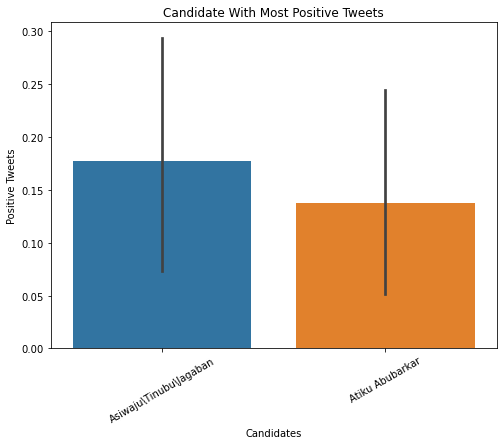

In [46]:
# plotting a barplot
fig = plt.figure(figsize =(8, 6))
plt.xticks(rotation=30)
sns.barplot(data=df1, x='search', y='Polarity').set(title='Candidate With Most Positive Tweets', xlabel ='Candidates', ylabel = 'Positive Tweets');


OBSERVATION

The analysis shows that Tinubu has the most polarity (positive tweets) among the other political opponent. Followed by Atiku. no data could be found on peter obi